In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
movies = pd.read_csv('movie_dataset.csv')
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [2]:
movies['vote_count'] = pd.to_numeric(movies['vote_count'])


In [3]:
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
#vote_averages = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
#C = vote_averages.mean()

In [12]:
#print(C)

In [5]:
m = movies['vote_count'].quantile(0.95)
m

3040.8999999999996

In [11]:
# Creating the dataframe of qualified movies

qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull())][['original_title','vote_count','genres']]
                   
qualified['vote_count'] = qualified['vote_count'].astype('int')
#qualified['imdb_rating'] = qualified['imdb_rating'].astype('int')
                   
print(qualified.shape)  #the dimensions of the qualified table (241*3)

(241, 3)


In [13]:
qualified = qualified.sort_values('vote_count', ascending=False).head(250)
qualified

,original_title,vote_count,genres
96,Inception,13752,Action Thriller Science Fiction Mystery Adventure
65,The Dark Knight,12002,Drama Action Crime Thriller
0,Avatar,11800,Action Adventure Fantasy Science Fiction
16,The Avengers,11776,Science Fiction Action Adventure
788,Deadpool,10995,Action Adventure Comedy
95,Interstellar,10867,Adventure Drama Science Fiction
287,Django Unchained,10099,Drama Western
94,Guardians of the Galaxy,9742,Action Science Fiction Adventure
426,The Hunger Games,9455,Science Fiction Adventure Fantasy
127,Mad Max: Fury Road,9427,Action Adventure Science Fiction Thriller


Text(0,0.5,'Votes in Millions')

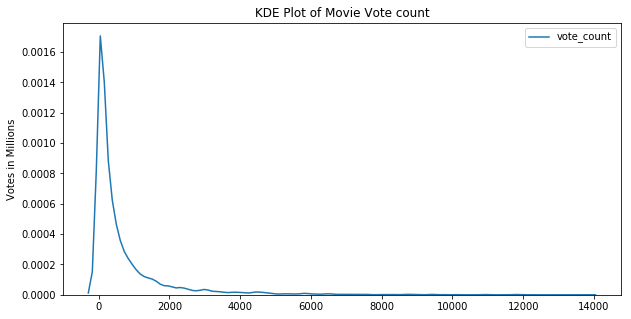

In [15]:
#frequencies of movies across the votes range
plt.figure(figsize=(10,5))
sns.kdeplot(movies['vote_count'].sort_values(ascending=False))
plt.title('KDE Plot of Movie Vote count')
plt.ylabel('Votes in Millions')

In [16]:
movies["vote_average"].mean()

6.092171559442011

In [20]:
print("Maximum vote average:",movies["vote_average"].max(),"\nMinimum vote average:",movies["vote_average"].min())

Maximum vote average: 10.0 
Minimum vote average: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


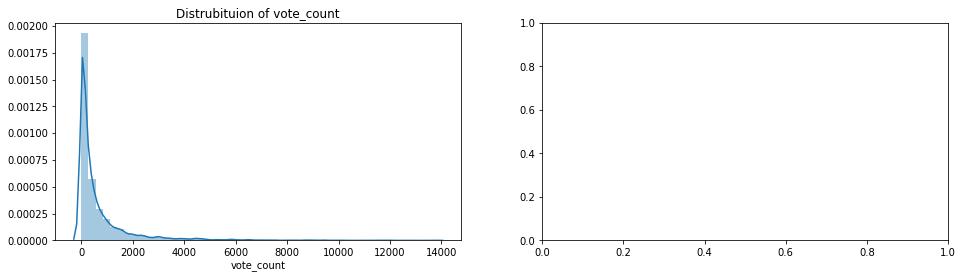

In [23]:
fig, axis = plt.subplots(1,2,figsize=(16,4))
axis[0].set_title('Distrubituion of vote_count')
ax = sns.distplot(movies['vote_count'].dropna(), ax=axis[0])


In [30]:
print(movies.shape)
qualified1 = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull())][['original_title','budget','vote_count','genres']]                   
qualified1['vote_count'] = qualified1['vote_count'].astype('int')
qualified1['budget'] = qualified1['budget'].astype('int')
qualified1 = qualified1.sort_values('budget', ascending=False).head(250)
qualified1


(4803, 24)


,original_title,budget,vote_count,genres
17,Pirates of the Caribbean: On Stranger Tides,380000000,4948,Adventure Action Fantasy
1,Pirates of the Caribbean: At World's End,300000000,4500,Adventure Fantasy Action
7,Avengers: Age of Ultron,280000000,6767,Action Adventure Science Fiction
6,Tangled,260000000,3330,Animation Family
5,Spider-Man 3,258000000,3576,Fantasy Action Adventure
22,The Hobbit: The Desolation of Smaug,250000000,4524,Adventure Fantasy
3,The Dark Knight Rises,250000000,9106,Action Crime Drama Thriller
8,Harry Potter and the Half-Blood Prince,250000000,5293,Adventure Fantasy Family
9,Batman v Superman: Dawn of Justice,250000000,7004,Action Adventure Fantasy
98,The Hobbit: An Unexpected Journey,250000000,8297,Adventure Fantasy Action


In [35]:
def top_chart(dataset, col, var, votes='vote_count',vote_average='vote_average',percentile=0.85):
    
    '''
    This function takes a dataset, column, subset and voting statistics to return a top chart.
    1. Filters the original dataset
    2. Determines the threshold for qualification based on percentile
    3. Returns the top 10 results, sorted by vote_count
    '''
    
    df = dataset[dataset[col] == var]
    vote_counts = df[df[votes].notnull()][votes].astype('int')
    vote_averages = df[df[vote_average].notnull()][vote_average].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df[votes] >= m) & (df[votes].notnull()) & (df[vote_average].notnull())][['title', votes, vote_average]]
    qualified[votes] = qualified[votes].astype('int')
    qualified[vote_average] = qualified[vote_average].astype('int')
    
    qualified = qualified.sort_values('vote_count', ascending=False).head(250)
    
    return qualified.head(10)

In [36]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_movies = movies.drop('genres', axis=1).join(s)

In [37]:
top_chart(gen_movies, 'genre', 'Comedy', votes='vote_count',vote_average='vote_average')

,title,vote_count,vote_average
1356,The Hangover,6173,7
427,The Hangover Part II,3739,6
2312,Neighbors,2713,6
616,Ted 2,2463,6
2330,Mean Girls,2320,6
3263,Easy A,2210,6
2392,Superbad,2100,7
1173,The Intern,1881,7
2454,Dumb and Dumber,1859,6
913,Yes Man,1813,6


In [41]:
top_chart(gen_movies, 'genre', 'Animation', votes='vote_count',vote_average='vote_average')

,title,vote_count,vote_average
313,The Peanuts Movie,604,6


In [39]:
top_chart(gen_movies, 'genre', 'Romance')

,title,vote_count,vote_average
3444,Grease,1581,7


In [40]:
top_chart(gen_movies, 'genre', 'Adventure')

,title,vote_count,vote_average
132,Wrath of the Titans,1431,5
901,Robin Hood: Prince of Thieves,909,6
